# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [1]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 30.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

import librosa
import parselmouth

In [3]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

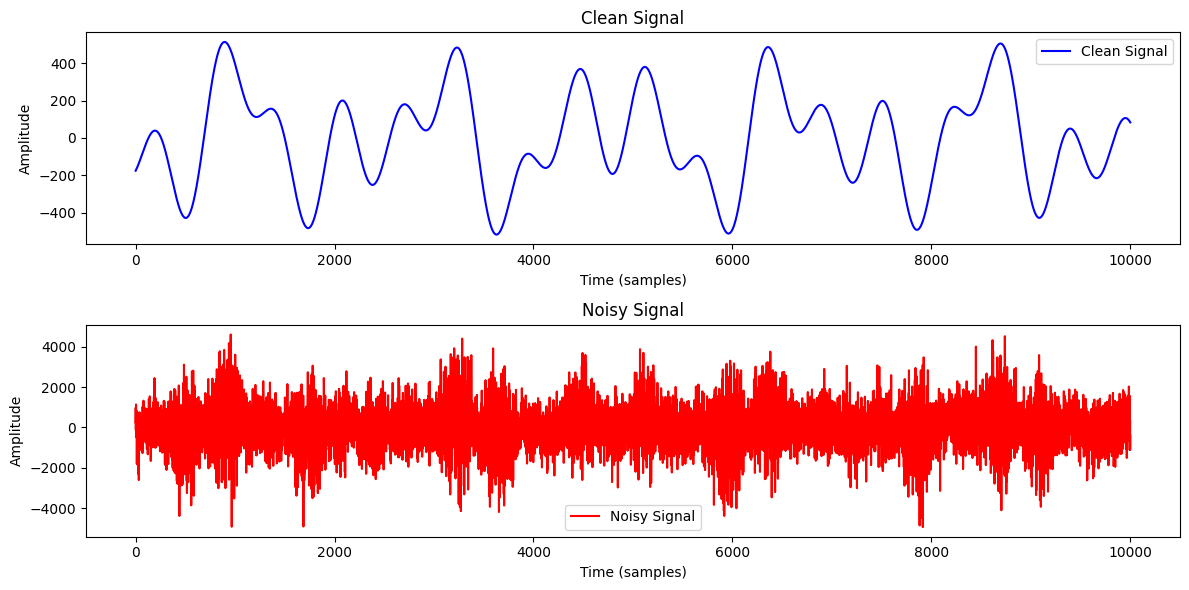

In [33]:
# TODO 1.1 : plot (1) clean signal and (2) noisy signal with label

# Plot the clean and noisy signals
plt.figure(figsize=(12, 6))

# Plot the clean signal
plt.subplot(2, 1, 1)
plt.plot(t, h, label='Clean Signal', color='blue')
plt.title('Clean Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the noisy signal
plt.subplot(2, 1, 2)
plt.plot(t, h_w_noise, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

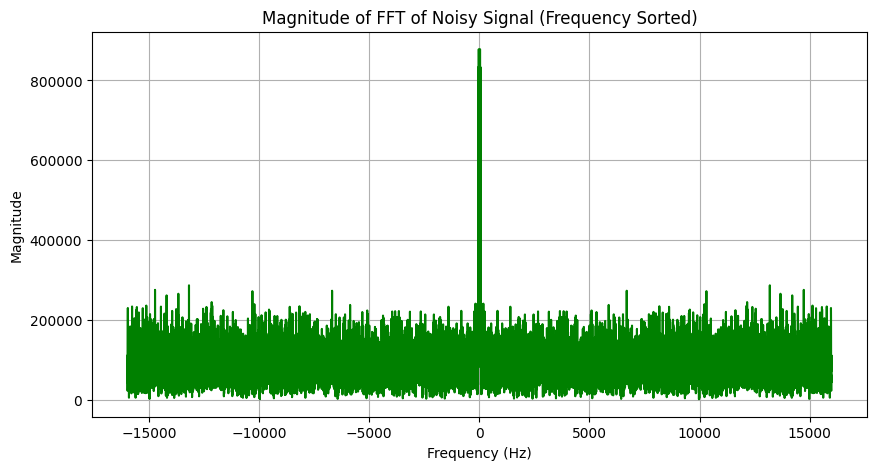

In [36]:
# TODO 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max)
# Compute the FFT of the noisy signal
H_w_noise_fft = np.fft.fft(h_w_noise)

# Compute the corresponding frequency bins
freqs = np.fft.fftfreq(N, d=1/sampling_rate)

# Get the magnitude of the FFT
magnitude = np.abs(H_w_noise_fft)

# Sort frequencies and corresponding magnitudes by frequency (from min to max)
sorted_indices = np.argsort(freqs)
sorted_freqs = freqs[sorted_indices]
sorted_magnitude = magnitude[sorted_indices]

# Plot the magnitude of the FFT
plt.figure(figsize=(10, 5))
plt.plot(sorted_freqs, sorted_magnitude, color='green')
plt.title('Magnitude of FFT of Noisy Signal (Frequency Sorted)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()



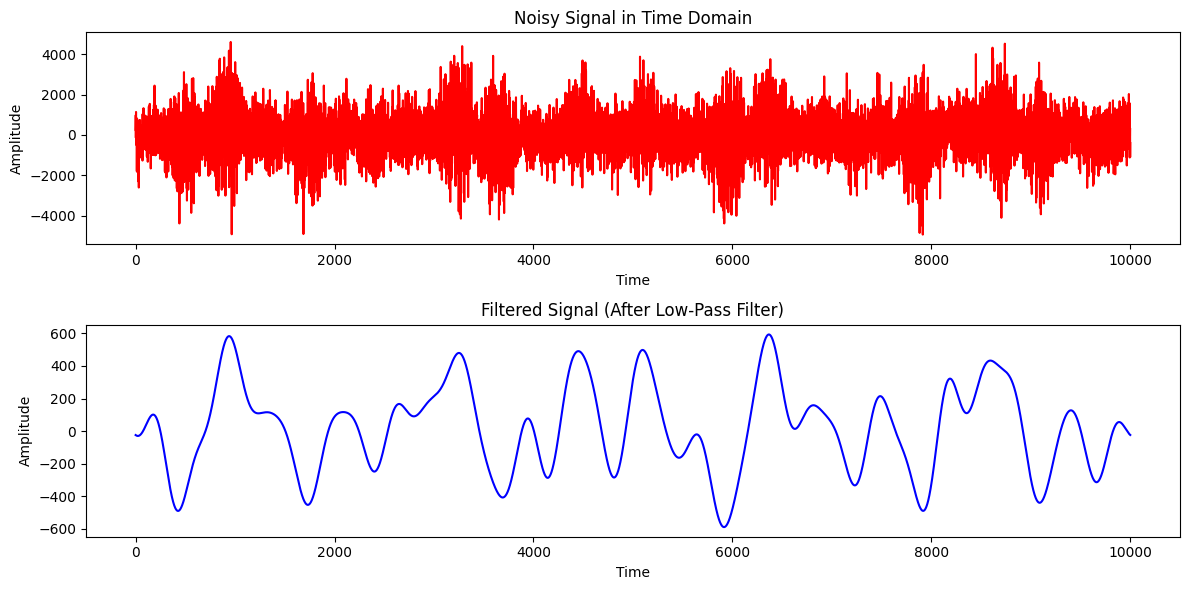

In [45]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT using low pass filter
# Parameters for the low-pass filter
cutoff_freq = 100  # Set cutoff frequency (in Hz)

# Compute the FFT of the noisy signal
H_w_noise_fft = np.fft.fft(h_w_noise)

# Compute the corresponding frequency bins
freqs = np.fft.fftfreq(N, d=1/sampling_rate)

# Design the low-pass filter by zeroing out high-frequency components
H_w_noise_fft_filtered = H_w_noise_fft.copy()
H_w_noise_fft_filtered[np.abs(freqs) > cutoff_freq] = 0  # Zero out frequencies above the cutoff

# Inverse FFT to get back the time-domain signal
h_filtered = np.fft.ifft(H_w_noise_fft_filtered)

# Plot the original noisy signal and the filtered signal
plt.figure(figsize=(12, 6))

# Plot the noisy signal
plt.subplot(2, 1, 1)
plt.plot(t, h_w_noise, color='red')
plt.title('Noisy Signal in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the filtered signal
plt.subplot(2, 1, 2)
plt.plot(t, h_filtered.real, color='blue')
plt.title('Filtered Signal (After Low-Pass Filter)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


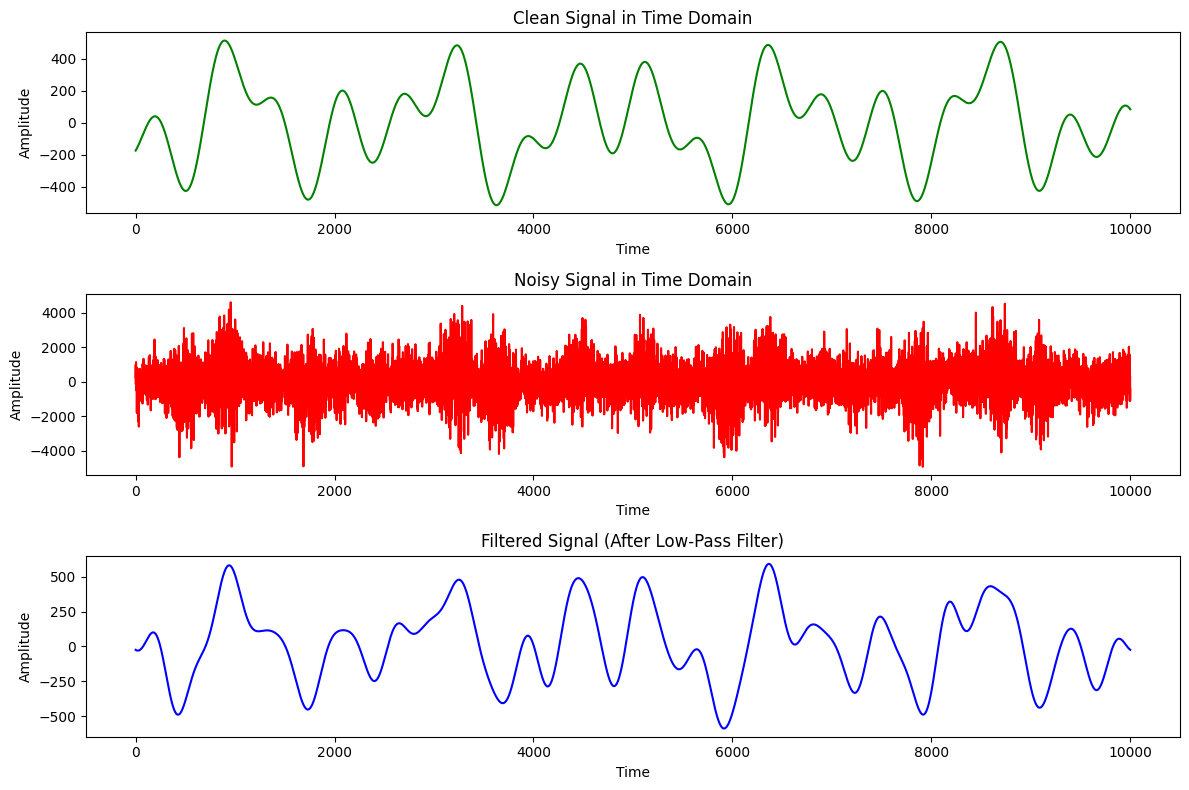

In [46]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 3.3) with label

# Plot the clean signal, noisy signal, and filtered signal
plt.figure(figsize=(12, 8))

# Plot the clean signal
plt.subplot(3, 1, 1)
plt.plot(t, h, color='green')
plt.title('Clean Signal in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, h_w_noise, color='red')
plt.title('Noisy Signal in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, h_filtered.real, color='blue')  # Use .real to get rid of the small imaginary parts
plt.title('Filtered Signal (After Low-Pass Filter)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [47]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered

import IPython.display as ipd
import numpy as np

# Ensure the signals are numpy arrays with float data type and are properly normalized
h_norm = h / np.max(np.abs(h)).astype(np.float32)
h_w_noise_norm = h_w_noise / np.max(np.abs(h_w_noise)).astype(np.float32)
h_filtered_norm = h_filtered.real / np.max(np.abs(h_filtered.real)).astype(np.float32)  # Use real part for filtered signal

# Listen to the clean signal
print("Original (Clean) Signal:")
ipd.display(ipd.Audio(h_norm, rate=sampling_rate))

# Listen to the noisy signal
print("Noisy Signal:")
ipd.display(ipd.Audio(h_w_noise_norm, rate=sampling_rate))

# Listen to the filtered signal
print("Filtered Signal:")
ipd.display(ipd.Audio(h_filtered_norm, rate=sampling_rate))


Original (Clean) Signal:


Noisy Signal:


Filtered Signal:



# TODO 1.6 : Write to explain and analyze the results

### Explanation and Results:

#### 1. **Original Signal**:
The original signal is made of several clean sine waves with different frequencies, amplitudes, and phases. It sounds smooth and periodic, with no distortion.

#### 2. **Noisy Signal**:
When noise is added, the signal becomes erratic, and it's hard to hear the original tones. The noise introduces random fluctuations, creating a messy and distorted sound.

#### 3. **Filtered Signal**:
After applying the low-pass filter, most of the noise is removed. The filtered signal is smoother and closer to the original, with the main frequencies restored. Some small noise might still be present, but the sound is much clearer.

### Summary:
- **Original**: Clean, smooth tones.
- **Noisy**: Distorted, with a lot of random noise.
- **Filtered**: Much clearer, with most noise removed.

The filtering worked well, removing most of the high-frequency noise and recovering the key parts of the original signal.


## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

In [49]:
!wget https://i.ibb.co/JBTVZ66/hamtaro.png -O hamtaro.png

--2024-09-26 02:26:05--  https://i.ibb.co/JBTVZ66/hamtaro.png
Resolving i.ibb.co (i.ibb.co)... 162.19.58.156, 162.19.58.160, 162.19.58.159, ...
Connecting to i.ibb.co (i.ibb.co)|162.19.58.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1484565 (1.4M) [image/png]
Saving to: ‘hamtaro.png’

hamtaro.png         100%[===================>]   1.42M  --.-KB/s    in 0.1s    

2024-09-26 02:26:06 (13.7 MB/s) - ‘hamtaro.png’ saved [1484565/1484565]



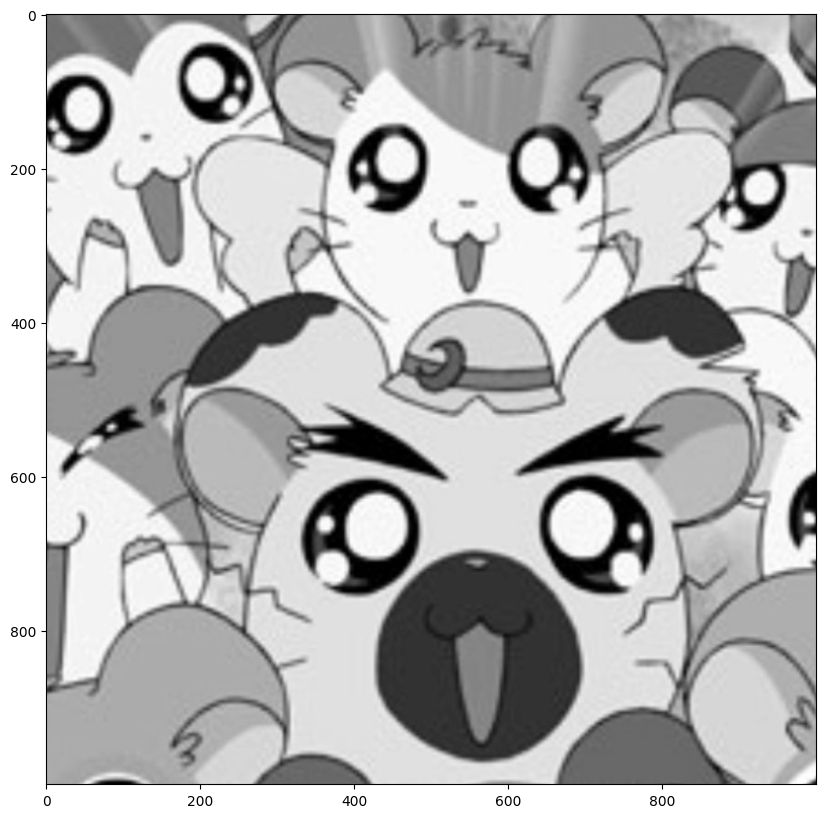

In [50]:
screen_shot = cv2.imread('hamtaro.png',0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

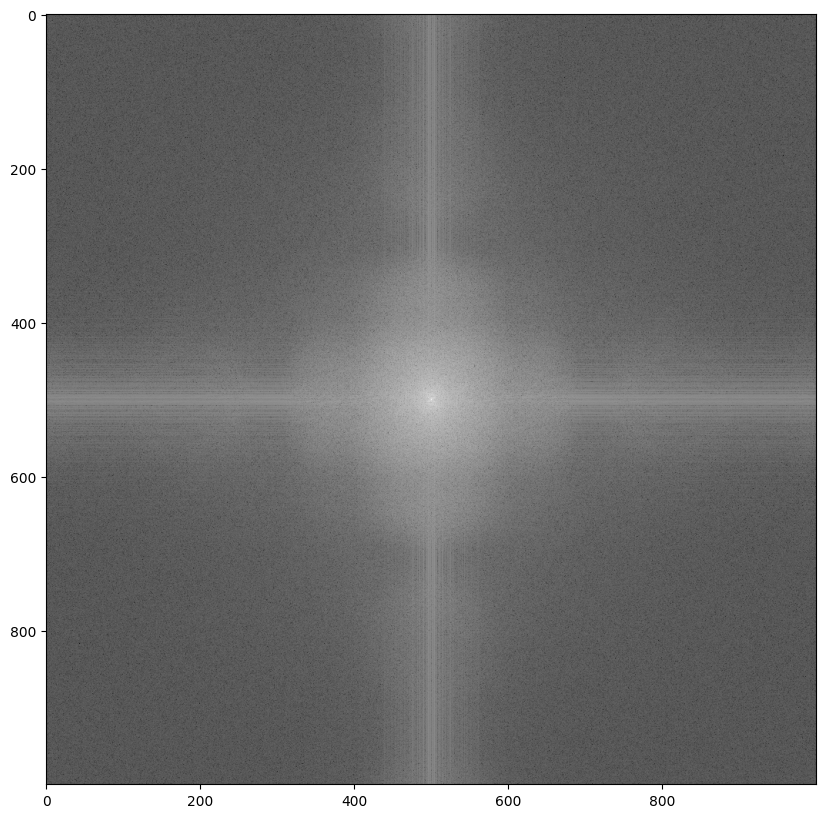

In [51]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

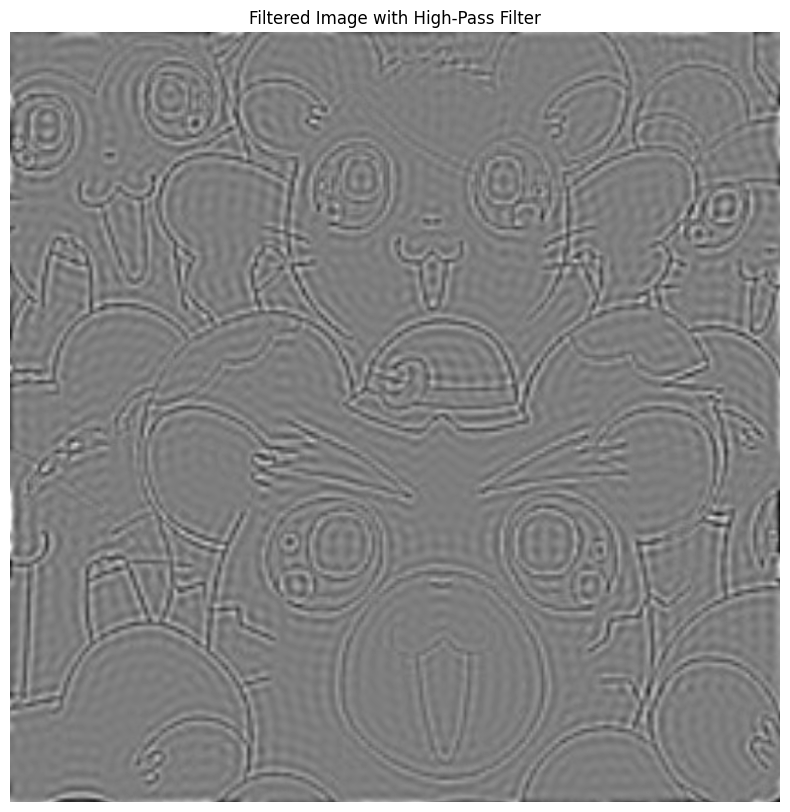

In [55]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image
n = 100


# Create a high-pass filter
rows, cols = screen_shot.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a mask with zeros (low frequencies)
mask = np.zeros((rows, cols))

# Set the central square to 1 (this represents the low frequencies)
mask[crow - n // 2:crow + n // 2, ccol - n // 2:ccol + n // 2] = 1

# Apply the high-pass filter
F2_filtered = F2 * (1 - mask)  # High-pass filtering by subtracting the low frequencies

# Perform inverse FFT
filtered_image = fftpack.ifft2(fftpack.ifftshift(F2_filtered)).real

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image with High-Pass Filter")
plt.axis('off')
plt.show()


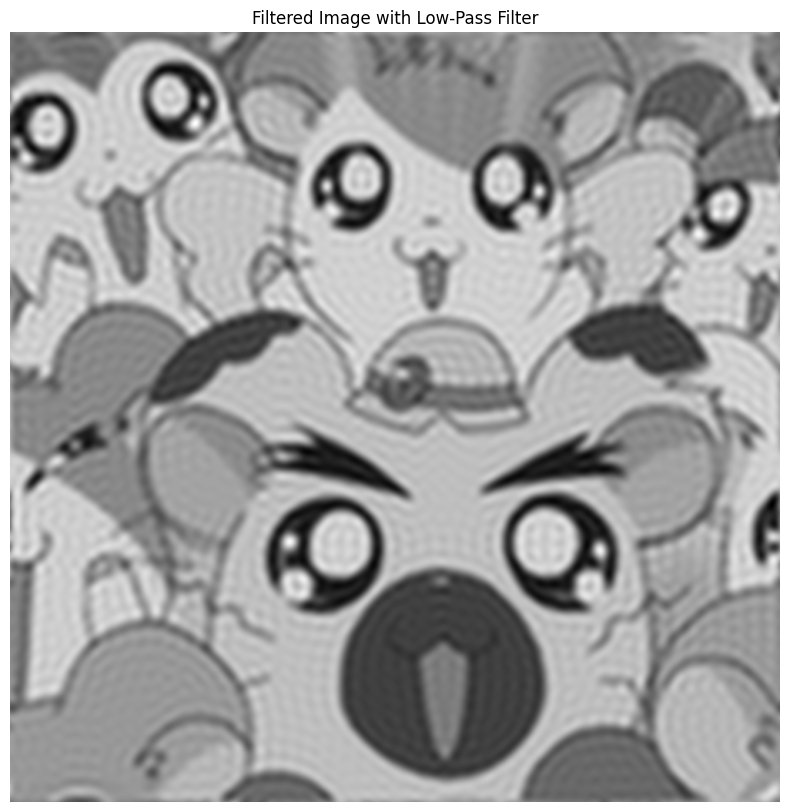

In [59]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image
n = 100  # Size of the filter

# Create a low-pass filter
rows, cols = screen_shot.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a mask with ones (low frequencies)
mask = np.zeros((rows, cols))

# Set the central square to 0 (this represents the high frequencies)
mask[crow - n // 2:crow + n // 2, ccol - n // 2:ccol + n // 2] = 1

# Apply the low-pass filter
F2_filtered_lowpass = F2 * mask  # Low-pass filtering by keeping the low frequencies

# Perform inverse FFT
filtered_image_lowpass = fftpack.ifft2(fftpack.ifftshift(F2_filtered_lowpass)).real

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image_lowpass, cmap='gray')
plt.title("Filtered Image with Low-Pass Filter")
plt.axis('off')
plt.show()


## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

In [ ]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



In [ ]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [ ]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [ ]:
x02_ts02

In [ ]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans:

### Problem 5
Download the 3 audio files and analyze all 3 signals with preliminary analysis.
(HINT : Use a log scale for both frequency and magnitude.)"

1. bass-guitar-single-note --> mixkit-bass-guitar-single-note-2331.wav

explain pattern of signal

In [ ]:
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-bass-guitar-single-note-2331.wav